In [1]:
import matplotlib as plt
import os
import json
import pandas as pd

In [4]:

rep="GHz.json"
l=dict()

for file in os.listdir():
    if ".json" in file and "+" not in file:
        key=file.replace(rep,"")
        f=open(file)
        data=json.load(f)
        l[key]=data["simSeconds"]

df = pd.DataFrame(
    [{"clock frequency in GHz": float(freq), "simSeconds": sim} for (freq,sim)  in l.items()])

df=df.sort_values(by=['clock frequency in GHz'],ascending=True)

df = df.reset_index(drop=True)

df

,clock frequency in GHz,simSeconds
0,0.6,0.388892
1,0.8,0.291611
2,1.0,0.233288
3,1.2,0.194329
4,1.4,0.166568
5,1.6,0.145805
6,1.8,0.129708
7,2.0,0.116644
8,2.2,0.106146
9,2.4,0.097281


<AxesSubplot:title={'center':'No of seconds simulated vs clock frequency'}, xlabel='clock frequency in GHz'>

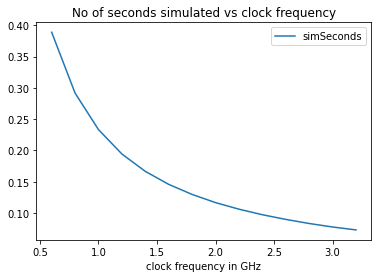

In [5]:
df.plot(x='clock frequency in GHz', y='simSeconds',title = 'No of seconds simulated vs clock frequency')

In [19]:
rep=".json"
l=dict()

for file in os.listdir():
    if "1GHz+Timing.json" in file or "1GHz+Timing+NoCache.json" in file:
        key=file.replace(rep,"")
        f=open(file)
        data=json.load(f)
        l[key]=data["simSeconds"]

df = pd.DataFrame(
    [{"Configuration": (freq), "simSeconds": sim} for (freq,sim)  in l.items()])

#df=df.sort_values(by=['clock frequency in GHz'],ascending=True)

#df = df.reset_index(drop=True)

df

,Configuration,simSeconds
0,1GHz+Timing+NoCache,9.790468
1,1GHz+Timing,0.226030


<AxesSubplot:title={'center':'simSeconds vs configuration'}, xlabel='Configuration'>

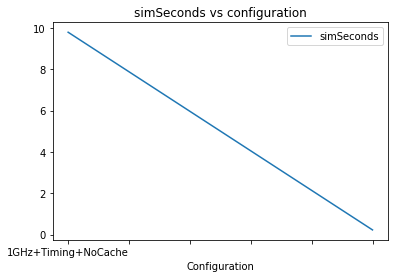

In [20]:
df.plot(x='Configuration', y='simSeconds',title = 'simSeconds vs configuration')

In [22]:
rep=".json"
l=dict()

for file in os.listdir():
    if "1GHz+Atomic+DDR3.json" in file or "1GHz+Atomic+DDR4.json" in file:
        key=file.replace(rep,"")
        f=open(file)
        data=json.load(f)
        l[key]=data["hostInstRate "]

df = pd.DataFrame(
    [{"Configuration": (freq), "hostInstRate": sim} for (freq,sim)  in l.items()])

#df=df.sort_values(by=['clock frequency in GHz'],ascending=True)

#df = df.reset_index(drop=True)

df

,Configuration,hostInstRate
0,1GHz+Atomic+DDR3,1103946.0
1,1GHz+Atomic+DDR4,1154578.0


In [15]:
rep=".json"
l=dict()

for file in os.listdir():
    if ".json" in file and "+" in file:
        key=file.replace(rep,"")
        key=key.replace("3.2GHz+","")
        f=open(file)
        data=json.load(f)
        ex_time=data["simInsts"]*data["board.processor.cores.core.cpi"]/(data["clk_freq"]*10**9)
        l[key]=ex_time

df = pd.DataFrame(
    [{"CPU Type": (freq), "Execution Time in s": sim} for (freq,sim)  in l.items()])

#df=df.sort_values(by=['clock frequency in GHz'],ascending=True)

#df = df.reset_index(drop=True)

df

,CPU Type,Execution Time in s
0,Atomic,0.072903
1,Minor,2.323170
2,O3,0.801723
3,Timing,8.313445


<AxesSubplot:title={'center':'Execution Time vs CPU Type'}, xlabel='CPU Type'>

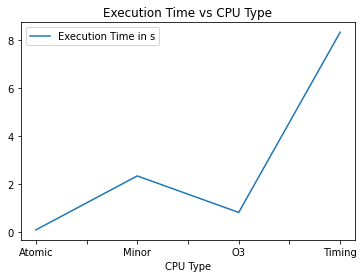

In [16]:
df.plot(x='CPU Type', y='Execution Time in s',title = 'Execution Time vs CPU Type')